In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
# Read the CSV file
file_path = '../cme_and_electron/cme_josias_10MeV.csv'
df = pd.read_csv(file_path)

In [21]:
def plot_sorted_distributions(y_train, y_val, y_test, title='Sorted Distributions'):
    """
    Plots the sorted target variable distributions for the training, validation, and test sets.
    
    :param:
    - y_train: Numpy array containing the training set target variable
    - y_val: Numpy array containing the validation set target variable
    - y_test: Numpy array containing the test set target variable
    - title: Title for the plot
    """
    plt.figure(figsize=(12, 6))

    # Sort and plot the target variable for each set
    plt.plot(np.sort(y_train), label='Train', marker='o')
    plt.plot(np.sort(y_val), label='Validation', marker='x')
    plt.plot(np.sort(y_test), label='Test', marker='s')

    plt.xlabel('Index')
    plt.ylabel('log_peak_intensity')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

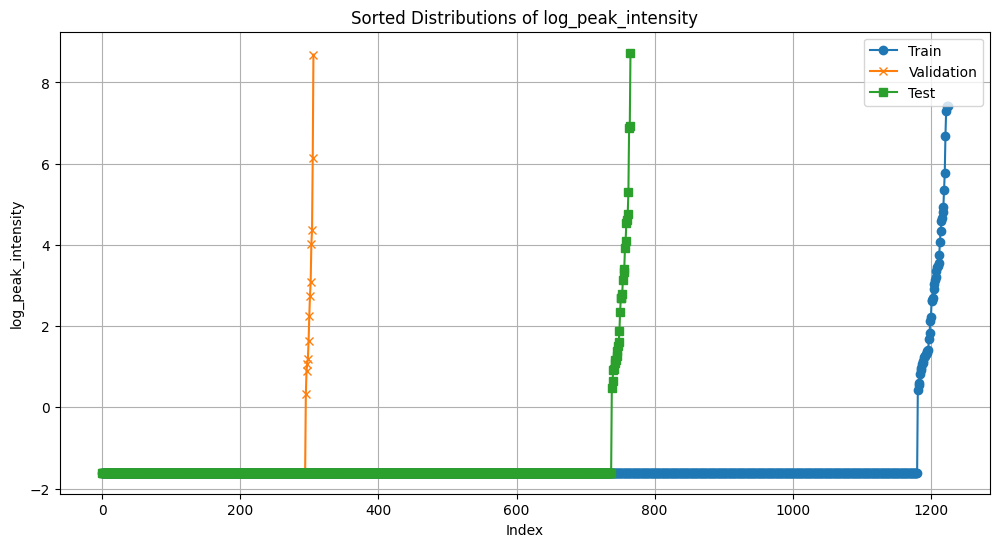

In [22]:
plot_sorted_distributions(train_y, val_y, test_y, title='Sorted Distributions of log_peak_intensity')

In [15]:
import random


def find_optimized_random_batch_size(y, threshold=np.log(10), num_trials=1000, early_exit_ratio=0.95):
    """
    Optimized function to find the minimum batch size such that, when sampled at random,
    each batch is likely to contain at least 2 rows with target values greater than a given threshold.
    
    Parameters:
    - y: Numpy array containing the target values
    - threshold: The target threshold, default is ln(10)
    - num_trials: Number of trials to perform for each batch size
    - early_exit_ratio: The success ratio to achieve before stopping the trials for a given batch size
    
    Returns:
    - Minimum batch size that fulfills the condition
    """
    # Count the number of elements greater than the threshold
    count_above_threshold = np.sum(y > threshold)

    # If there are fewer than 2 elements above the threshold, return a message
    if count_above_threshold < 2:
        raise ValueError("There are not enough samples with target values greater than the threshold.")

    # Loop through possible batch sizes, starting from 2
    for batch_size in range(2, len(y) + 1):
        print(batch_size)
        success_count = 0

        for trial in range(num_trials):
            # Sample a random batch
            random_batch = random.sample(list(y), batch_size)

            # Check if the batch contains at least 2 elements greater than the threshold
            if np.sum(np.array(random_batch) > threshold) >= 2:
                success_count += 1

            # Early exit if success ratio is achieved
            if trial >= 5000 and success_count / (trial + 1) >= early_exit_ratio:
                return batch_size

In [ ]:
# Find the minimum batch size for the training set that satisfies the condition, using the optimized function
min_optimized_random_batch_size = find_optimized_random_batch_size(shuffled_train_y, num_trials=50000,
                                                                   early_exit_ratio=0.99)
min_optimized_random_batch_size

In [16]:
training_set_path = 'D:/College/Fall2023/sep-forecasting-research/data/electron_cme_data_split/training'

In [17]:
from modules.training.ts_modeling import build_dataset

In [18]:
X_train, y_train = build_dataset(training_set_path, inputs_to_use=['e0.5'], add_slope=False)

In [19]:
# print the result of np.log(353)
print(np.log(353))

5.8664680569332965


In [ ]:
# find the minimum batch size for the training set that satisfies the condition, using the optimized function
min_optimized_random_batch_size = find_optimized_random_batch_size(y_train, threshold=4.9, num_trials=2000,
                                                                   early_exit_ratio=0.99)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


In [ ]:
# Print the result
min_optimized_random_batch_size